<a href="https://colab.research.google.com/github/KevoKillmonger/Petty-Mayonaise/blob/master/ImageRecognition_MNIST_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The MNIST dataset is a set of digits uniquely written by hand.

This is a multiclass dataset. The softmax function is more useful than sigmoid

This dataset has 10 classes. 

to analyze the images, 784 nodes are needed, representing pixels.

Data is split into training and test datasets

Training sets contains labels used to update the weights and biases accordingly

eventually, training errors are minimized.

We wanted our trained model to effectively generalise our test data.

In [21]:
 !pip3 install torchvision

In [22]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms  #TorchVision contains datasets including MNIST

1. Below, we load the dataset and specify our arguments
2. We specify 'root', the directory of our data, where our data is saved in 'data'
3. We specify 'train', making it equal to true, to initialize the MNIST dataset
4.'download'= to True to download MNIST onto the data folder
5. 'tranform' 

In [23]:
#Compose allows chains of transformations
#ToTensor converts np array from range (0-255) to float tensor range (0-1)

transform = transforms.Compose([transforms.ToTensor(), #transforms arrays to tensors
                                transforms.Normalize((0.5,), (0.5,))#Normalize image values for Channel, height and width(CHW)
                                ])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)


training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=100, shuffle=True)#we specify our training batches

In [24]:
#To plot tensor image, we convert back to numpy array
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1, 2, 0)
 
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image
  

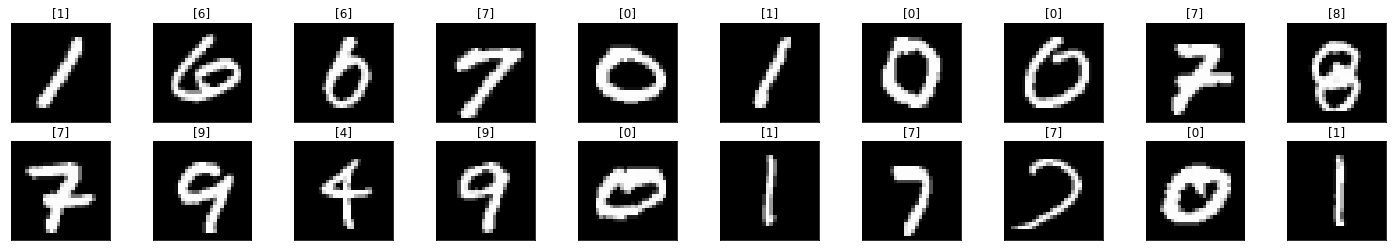

In [25]:
dataiter = iter(training_loader)#create object that allows us to iter one element at a time
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])


In [26]:
class Classifier(nn.Module):#create class to create neural instances 
  def __init__(self, D_in, H1, H2, D_out):#args a nodes in hidden layers
    super().__init__()#here, we've defined the neural model in the constructor
    self.Linear1 = nn.Linear(D_in, H1)#input layer and 
    self.Linear2 = nn.Linear(H1, H2)#first hidden layer
    self.Linear3 = nn.Linear(H2, D_out)#2nd hidden layer
  def forward(self, x):#we feed forward input to network
    x = F.relu(self.Linear1(x))
    x = F.relu(self.Linear2(x))
    x = self.Linear3(x)
    return x


In [27]:
model = Classifier(784, 125, 65, 10)#(pixels, nodes, 1 hidden layer, 2 hidden layer, # of classes )
model

Classifier(
  (Linear1): Linear(in_features=784, out_features=125, bias=True)
  (Linear2): Linear(in_features=125, out_features=65, bias=True)
  (Linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [29]:
epochs = 15
running_loss_history = []
running_corrects_history = []

for e in range(epochs):#We iterate through every epoch

  running_loss = 0.0
  running_corrects = 0.0
  for inputs, labels in training_loader:#we iterate through batches of images
    inputs = inputs.view(inputs.shape[0], -1)#images flattened
    outputs = model(inputs)
    loss = criterion(outputs, labels)#determine loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)#preds contains top class prediction for each image 
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
  else:
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    print('Training loss: {:.4f}, {:.4f} '.format(epoch_loss, epoch_acc.item()))
    

Training loss: 0.9932, 76.6200 
Training loss: 0.3837, 89.1617 
Training loss: 0.3212, 90.7200 
Training loss: 0.2885, 91.5717 
Training loss: 0.2632, 92.3783 
Training loss: 0.2423, 92.9817 
Training loss: 0.2239, 93.5650 
Training loss: 0.2063, 94.0567 
Training loss: 0.1927, 94.4400 
Training loss: 0.1792, 94.8067 
Training loss: 0.1683, 95.1067 
Training loss: 0.1576, 95.4817 
Training loss: 0.1486, 95.7167 
Training loss: 0.1400, 95.9717 
Training loss: 0.1323, 96.1883 


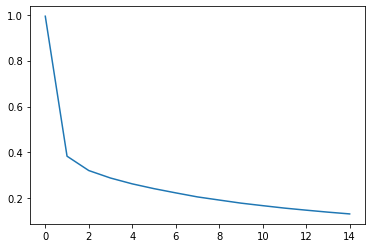

In [30]:
plt.plot(running_loss_history, label='training loss')

#remember, we're using Gradient descent
#The learning rate dictates the parameters. 

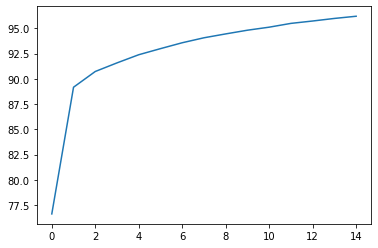

In [31]:
plt.plot(running_corrects_history, label='training accurary')